This notebook shows density plots, which help visualise the relationship between a binary target variable and numeric variables.

In [23]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
experiment_path = "fttp-propensity-model/notebooks/output/candidate_restricted_above_3_weeks_emlc/30/"

df = pd.read_csv(experiment_path + '/valid.csv')

In [14]:
# find boolean columns
bool_columns = [col for col in df if np.isin(df[col].dropna().unique(), [0, 1]).all()]
print(bool_columns)

['fttp_network_type_CBT_flag', 'dig_flag', 'residential_flag', 'is_greenfield_flag', 'ofcom_area2_flag', 'notspot_to_fttp_less_30mbps_flag', 'gfast_avl_flag', 'adsl_avl_flag', 'fttc_avl_flag', 'ever_had_asset_at_ord_flag', 'has_asset_at_ord_flag', 'act_FTTC_at_ord_flag', 'act_MPF_at_ord_flag', 'act_PSTN_at_ord_flag', 'act_SMPF_at_ord_flag', 'act_SOGEA_at_ord_flag', 'inact_FTTC_at_ord_flag', 'inact_MPF_at_ord_flag', 'inact_PSTN_at_ord_flag', 'inact_SMPF_at_ord_flag', 'inact_SOGEA_at_ord_flag', 'has_made_eoi_flag', 'is_competitor_at_postcode_flag', 'had_fault_ever_flag', 'n_faults_with_engg_total_flag', 'had_fault_in_last_six_months_flag', 'n_faults_with_engg_in_last_six_months_flag', 'had_fault_in_last_year_flag', 'n_faults_with_engg_in_last_year_flag', 'fttp_order']


In [16]:
# find all numeric columns
num_columns = list(set(df.select_dtypes(include=np.number).columns.tolist())-set(bool_columns))
print(num_columns)

['weeks_since_emlc_ok', 'digital_ordinal', 'household_income_ordinal', 'n_exch_faults_in_last_year', 'age_ordinal', 'circuit_count_at_ord', 'geo_type_ordinal', 'best_fttc_speed_mbps', 'best_adsl_speed_mbps', 'days_since_last_order', 'best_fibre_speed_mbps']


In [27]:
num_columns = ['weeks_since_emlc_ok', 'n_exch_faults_in_last_year', 'circuit_count_at_ord','best_fttc_speed_mbps', 'best_adsl_speed_mbps', 'days_since_last_order', 'best_fibre_speed_mbps']

In [25]:
target_column = 'fttp_order'

Density plots with common normalisation **show the inbalance of the target feature, but it is hard to compare the shapes** of the distributions to assess the relationship between the  binary target variable and numeric variables.

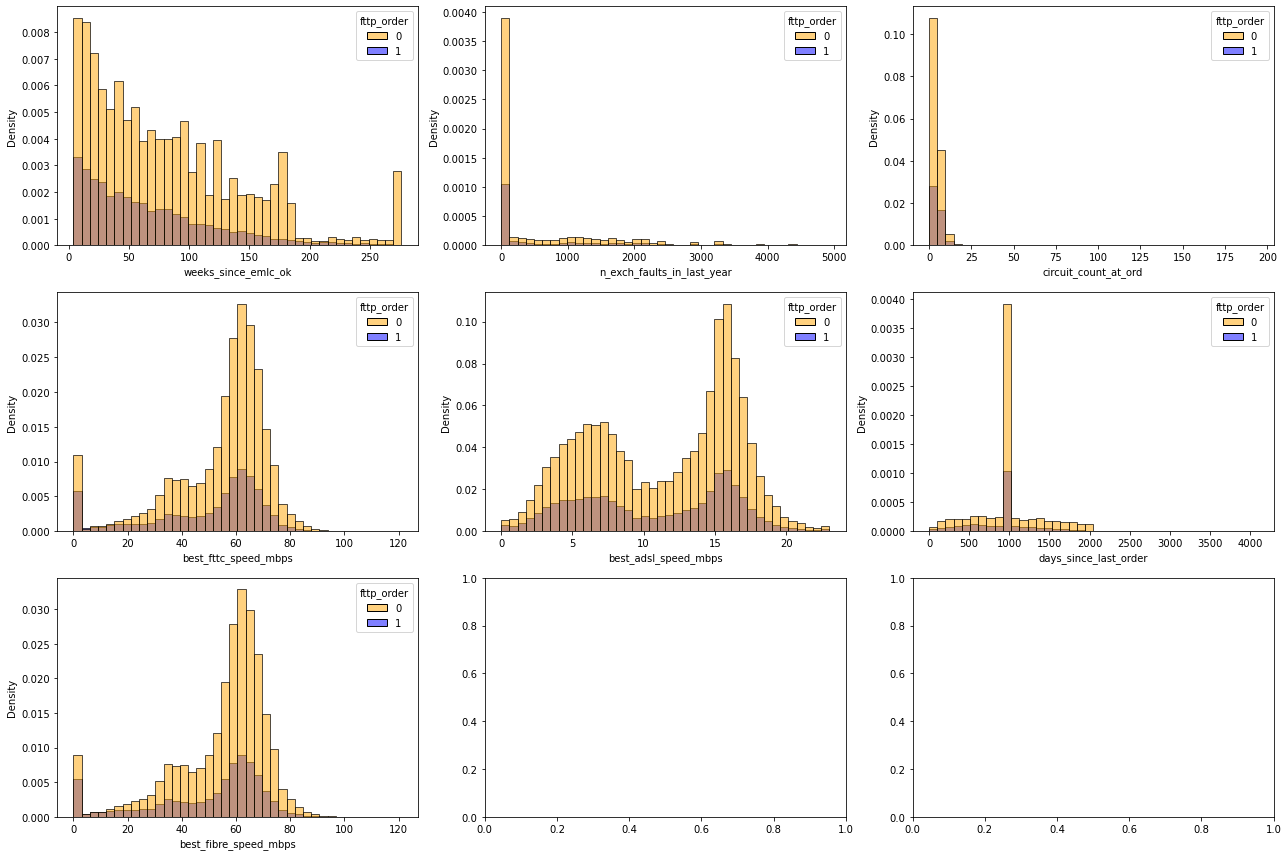

In [30]:
cols = num_columns
in_same_line = 3
num_of_lines = math.ceil(len(num_columns)/in_same_line)
fig, axs = plt.subplots(math.ceil(len(cols)/in_same_line), in_same_line, figsize=(in_same_line*6, num_of_lines*4))
ax_iter = iter(axs.flat)
for col in cols:
    ax = next(ax_iter)
    sns.histplot(data=df, x=col, bins=40, hue=target_column, palette=['orange', 'blue'], stat='density', common_norm=True, ax=ax)
plt.tight_layout()
plt.show()

Normalizing each histogram independently makes it **easier to visually assess the relationship between the two variables**, however, the inbalance of the data cannot be seen anymore.

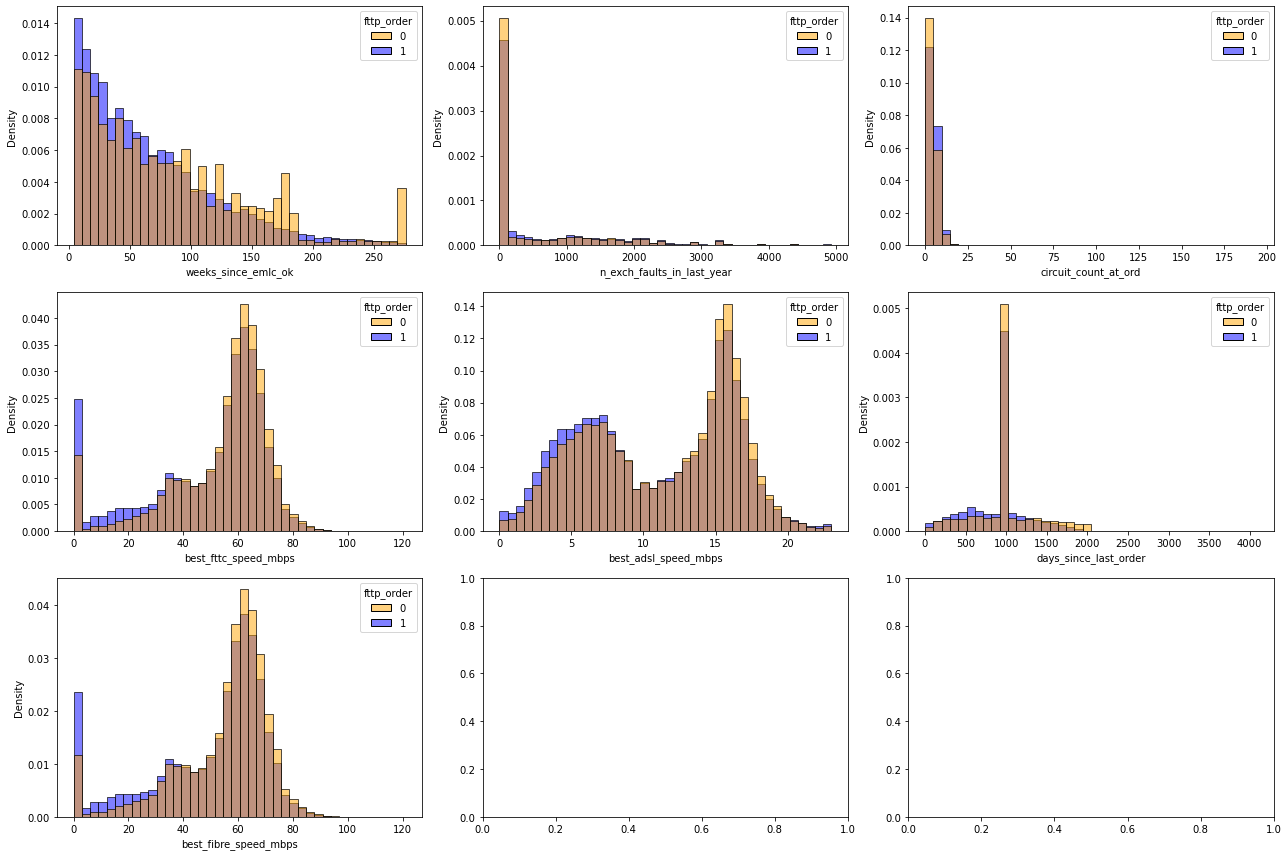

In [31]:
cols = num_columns
in_same_line = 3
num_of_lines = math.ceil(len(num_columns)/in_same_line)
fig, axs = plt.subplots(math.ceil(len(cols)/in_same_line), in_same_line, figsize=(in_same_line*6, num_of_lines*4))
ax_iter = iter(axs.flat)
for col in cols:
    ax = next(ax_iter)
    sns.histplot(data=df, x=col, bins=40, hue=target_column, palette=['orange', 'blue'], stat='density', common_norm=False, ax=ax)
plt.tight_layout()
plt.show()

I have found it helpful to plot the conversion rate for the bins on the same plot, **it does not look nice, it just gives you an idea about the trends in the data**.

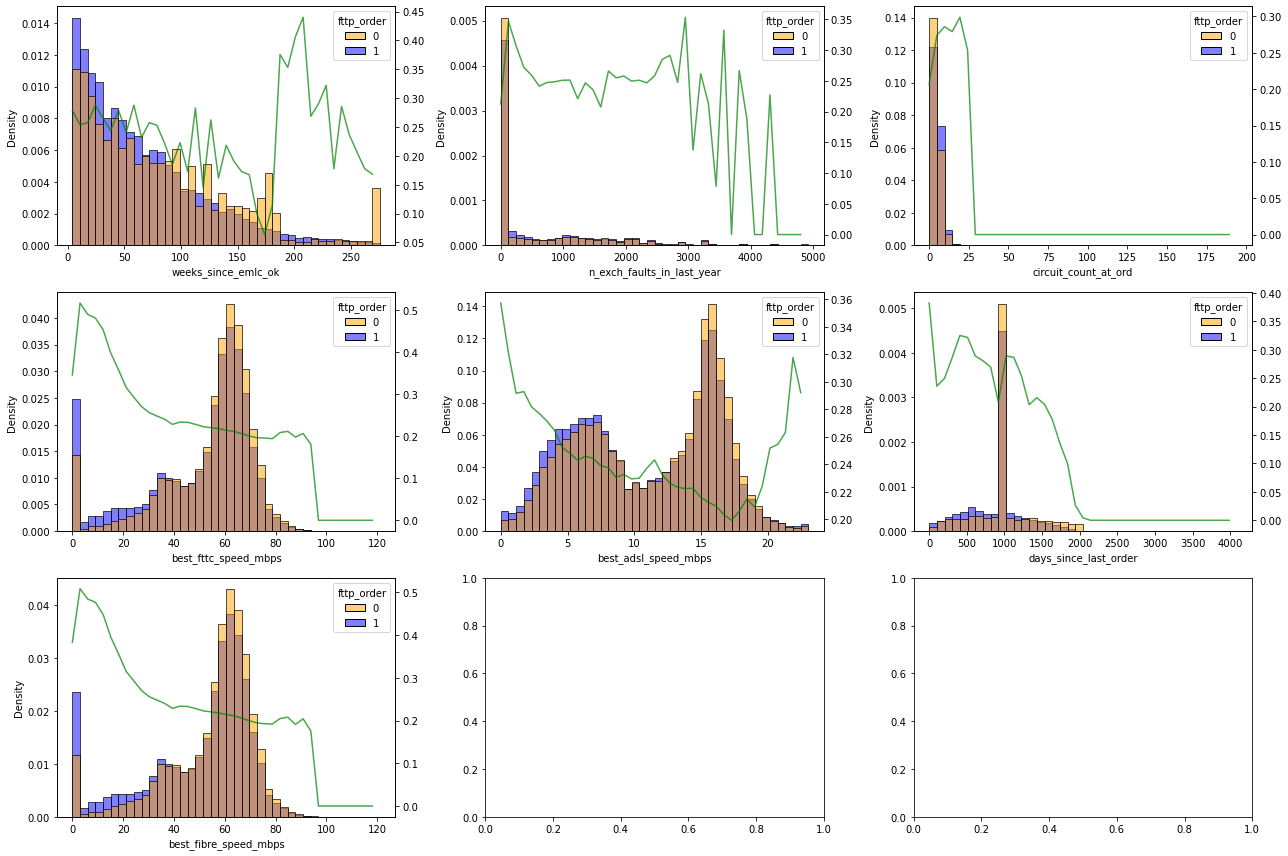

In [39]:
cols = num_columns
in_same_line = 3
num_of_lines = math.ceil(len(num_columns)/in_same_line)
fig, axs = plt.subplots(math.ceil(len(cols)/in_same_line), in_same_line, figsize=(in_same_line*6, num_of_lines*4))
ax_iter = iter(axs.flat)
for col in cols:
    ax = next(ax_iter)
    sns.histplot(data=df, x=col, bins=40, hue=target_column, palette=['orange', 'blue'], stat='density', common_norm=False, ax=ax)
    
    ax2 = ax.twinx()
    bins = np.histogram_bin_edges(df[col].dropna(), bins=40)
    count_per_bin = [len(df[(df[col] >= bins[i]) & (df[col] < bins[i+1])]) for i in range(len(bins) - 1)]
    positives_per_bin = [len(df[(df[target_column] == 1) & (df[col] >= bins[i]) & (df[col] < bins[i+1])]) for i in range(len(bins) - 1)]
    
    proportions = [positives_in_bin / count_in_bin if count_in_bin > 100 else 0 
                   for positives_in_bin, count_in_bin in zip(positives_per_bin, count_per_bin)]
    sns.lineplot(x=bins[:-1], y=proportions, color='green', ax=ax2, alpha=0.7)
    ax2.set_ylabel = 'Conversion rate for bin'
    
plt.tight_layout()
plt.show()